<a href="https://colab.research.google.com/github/SarthV/hello-world/blob/master/Elementary_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing general/ usually used libraries.


In [0]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


In [0]:
uploaded1 = files.upload()

Saving test.csv to test (2).csv


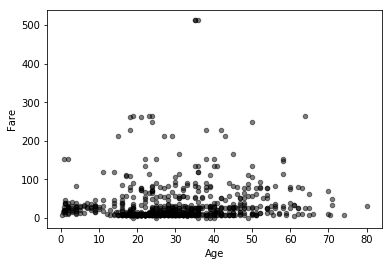

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.plot(kind = 'scatter', x = 'Age', y = 'Fare', alpha = 0.5, color = 'black')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 432x288 with 0 Axes>

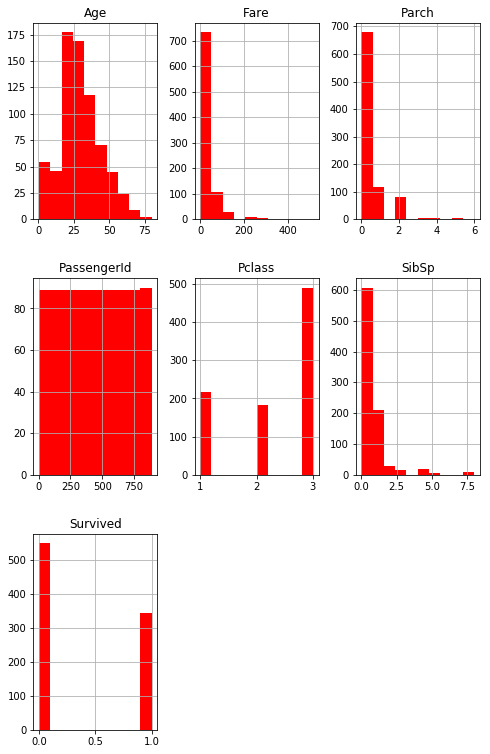

<Figure size 432x288 with 0 Axes>

In [0]:
df_train.hist(figsize = (8,13), color = 'red')
plt.figure()


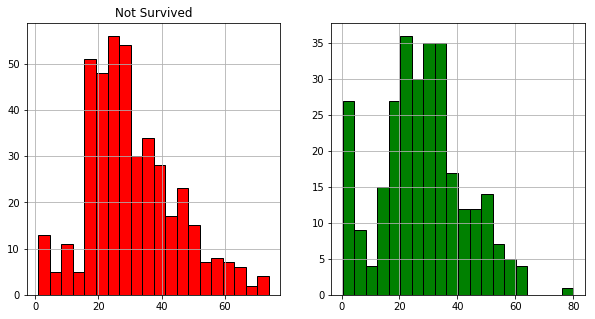

In [0]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
df_train[df_train['Survived'] == 0].Age.hist(ax = axes[0], bins = 20, color = 'red', edgecolor = 'black')
axes[0].set_title('Not Survived')
df_train[df_train['Survived'] == 1].Age.hist(ax  = axes[1], bins = 20, color = 'Green', edgecolor = 'black')

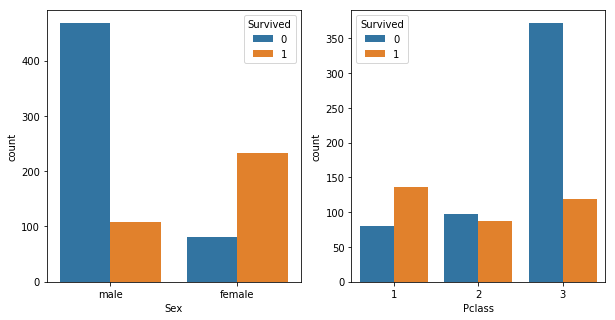

In [0]:
f, ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[0])
sns.countplot('Pclass', hue = "Survived", data= df_train, ax  = ax[1]) 

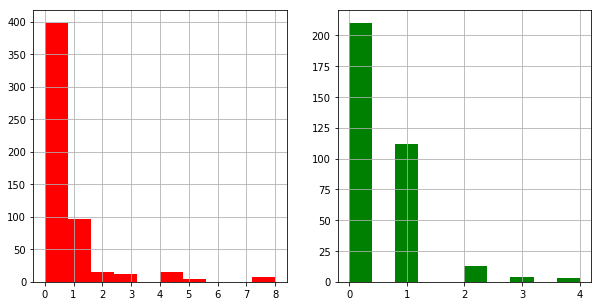

In [0]:
f, ax = plt.subplots(1,2, figsize = (10,5))
df_train[df_train['Survived'] == 0].SibSp.hist(color = 'red', ax = ax[0])
ax[0].set_xticks(list(range(0,9,1)))
df_train[df_train['Survived'] == 1].SibSp.hist(color = 'green')


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


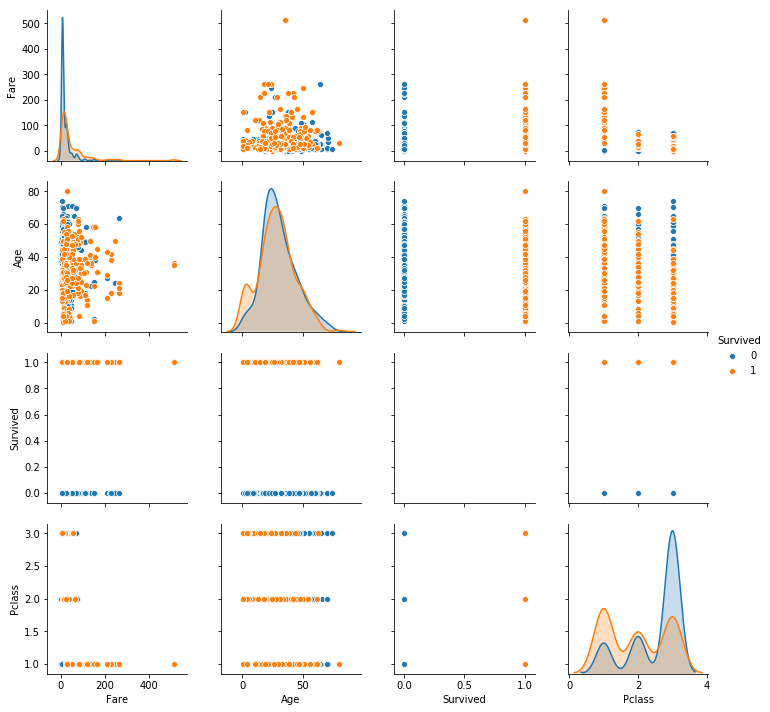

In [0]:
sns.pairplot(df_train[["Fare","Age", "Survived","Pclass"]], hue = "Survived", dropna = True)

## **Data Exploration and Preprocessing**


In [0]:
df_train.shape

(891, 12)

In [0]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
def find_missing_data(df):
  flag = df.isnull().sum().any()
  if(flag == True):
    total = df.isnull().sum()
    percent = ((df.isnull().sum())/(df.isnull().count())*100)
    Missing_Data = pd.concat([total,percent], axis = 1, keys = ['total', ' percent'])
    Data_Type = []
    for col in  df.columns:
           datatype = str(df[col].dtype)
           Data_Type.append(datatype)
    Missing_Data['Data Type'] = Data_Type  
    return(Missing_Data.T)
  else: return(False)

In [0]:
find_missing_data(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
total,0,0,0,0,0,177,0,0,0,0,687,2
percent,0,0,0,0,0,19.8653,0,0,0,0,77.1044,0.224467
Data Type,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [0]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    fare_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    temp = pd.cut(df.Fare, bins, labels = fare_names)
    df.Fare = temp
    return df
    
  
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)  

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_test = transform_features(df_test)


In [0]:
df_train = simplify_fares(df_train)
df_test = simplify_fares(df_test)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,Unknown,7,73,17
1,2,1,1,0,0,1,0,1_quartile,2,136,18
2,3,1,3,0,7,0,0,Unknown,7,251,14
3,4,1,1,0,7,1,0,1_quartile,2,198,18
4,5,0,3,1,7,0,0,1_quartile,7,11,17


In [0]:
def encode_feature(df):
  features = ['Sex', 'Age','Fare','Cabin','Lname', 'NamePrefix']
  #df_combined = pd.concat([df_train[features],df_test[features]])
  for feature in features:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])  
    df[feature] = le.transform(df[feature])
  return df


In [0]:
df_train = encode_feature(df_train)
df_test = encode_feature(df_test)

Applying various models.


In [0]:
x_features = df_train.drop(['Survived', 'PassengerId'], axis = 1)
y_target = df_train['Survived']

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
  X_train,X_test,Y_train,Y_test = train_test_split(x_features, y_target, test_size = 0.27)

In [0]:
result = None

In [0]:
rfc = RandomForestClassifier()

